In [167]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler 
import numpy as np
from sklearn.model_selection import train_test_split
import os, cv2
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D

In [168]:
data = pd.read_csv('/kaggle/input/skin-cancer-mnist-ham10000/hmnist_28_28_RGB.csv')
data.head()

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
0,192,153,193,195,155,192,197,154,185,202,...,173,124,138,183,147,166,185,154,177,2
1,25,14,30,68,48,75,123,93,126,158,...,60,39,55,25,14,28,25,14,27,2
2,192,138,153,200,145,163,201,142,160,206,...,167,129,143,159,124,142,136,104,117,2
3,38,19,30,95,59,72,143,103,119,171,...,44,26,36,25,12,17,25,12,15,2
4,158,113,139,194,144,174,215,162,191,225,...,209,166,185,172,135,149,109,78,92,2


In [169]:
data['label'].unique()

array([2, 4, 3, 6, 5, 1, 0])

In [170]:
y = data['label']
x = data.drop(columns = ['label'])

In [171]:
data.isnull().sum().sum() #no null values present

0

In [172]:
meta_data = pd.read_csv('/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_metadata.csv')
meta_data.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [173]:
meta_data['dx'].unique()

array(['bkl', 'nv', 'df', 'mel', 'vasc', 'bcc', 'akiec'], dtype=object)

Text(0.5, 1.0, 'Frequency Distribution of Classes')

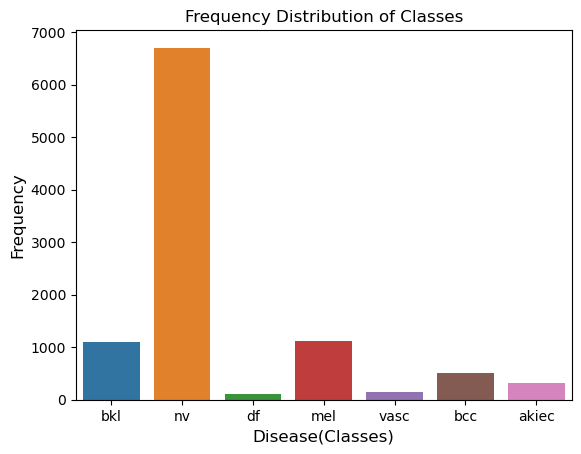

In [174]:
sns.countplot(x = 'dx', data = meta_data)
plt.xlabel('Disease(Classes)', size=12)
plt.ylabel('Frequency', size=12)
plt.title('Frequency Distribution of Classes')


In [175]:
print(x.shape,y.shape)
# To overcome class imbalace
oversample = RandomOverSampler()
x,y  = oversample.fit_resample(x,y)
print(x.shape,y.shape)

(10015, 2352) (10015,)
(46935, 2352) (46935,)


Text(0.5, 1.0, 'Frequency Distribution of Classes')

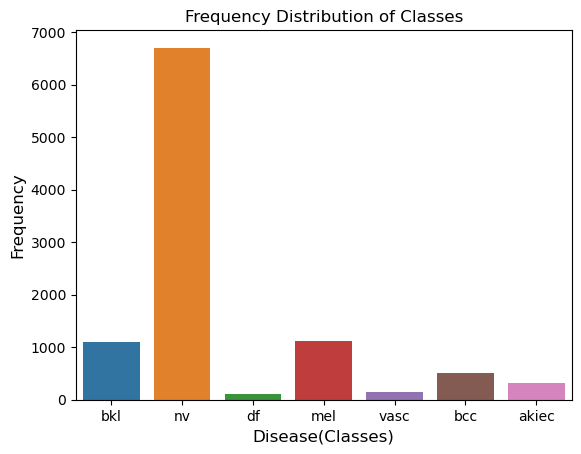

In [176]:
sns.countplot(x = 'dx', data = meta_data)
plt.xlabel('Disease(Classes)', size=12)
plt.ylabel('Frequency', size=12)
plt.title('Frequency Distribution of Classes')

In [177]:
# reshaping the data so that it can be taken by convolution neural network(without disturbing the no. of samples)
x = np.array(x).reshape(-1,28,28,3)
print('Shape of X :',x.shape)
print('Shape of y :',y.shape)

Shape of X : (46935, 28, 28, 3)
Shape of y : (46935,)


In [178]:
# Splitting Data
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size=0.2, random_state=1)
print(X_train.shape,Y_train.shape)
print(X_test.shape , Y_test.shape)

(37548, 28, 28, 3) (37548,)
(9387, 28, 28, 3) (9387,)


In [179]:
model = Sequential()

model.add(Conv2D(16, kernel_size = (3,3), input_shape = (28, 28, 3), activation = 'relu'))
model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu'))
model.add(Conv2D(64, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(7, activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 26, 26, 16)        448       
                                                                 
 conv2d_13 (Conv2D)          (None, 24, 24, 32)        4640      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 10, 10, 32)        9248      
                                                                 
 conv2d_15 (Conv2D)          (None, 8, 8, 64)          18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 4, 4, 64)         0         
 2D)                                                  

In [180]:
model.compile(loss = 'sparse_categorical_crossentropy',
             optimizer = 'adam',
              metrics = ['accuracy'])
history = model.fit(X_train,
                    Y_train,
                    validation_split=0.2,
                    batch_size = 128,
                    epochs = 50)

Epoch 1/50


KeyboardInterrupt: 

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

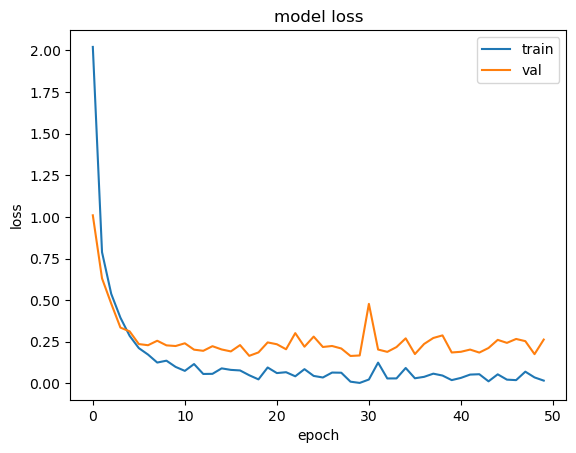

In [83]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [96]:
results = model.evaluate(X_test , Y_test, verbose=0)

print("    Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

    Test Loss: 0.24558
Test Accuracy: 96.27%


In [181]:
from sklearn.metrics import confusion_matrix , classification_report

y_true = list(Y_test)
y_pred = model.predict(X_test)
y_pred = list(map(lambda x: np.argmax(x), y_pred))
print('Y Actual Values :' , y_true[0:10])
print('Y Predicted Values :' , y_pred[0:10])

294/294 [==============================] - 3s 10ms/step
Y Actual Values : [5, 1, 4, 0, 5, 0, 2, 0, 3, 2]
Y Predicted Values : [3, 3, 3, 3, 3, 3, 3, 3, 3, 3]


In [182]:
classes = {2:'bkl', 4:'nv', 3:'df', 6:'mel', 5:'vasc', 1:'bcc', 0:'akiec'}

classes_labels=[]
for key in classes.keys():
    classes_labels.append(key)
print(classes_labels)

[2, 4, 3, 6, 5, 1, 0]


In [183]:
classes = {4: ('nv', ' melanocytic nevi'),
           6: ('mel', 'melanoma'),
           2 :('bkl', 'benign keratosis-like lesions'), 
           1:('bcc' , ' basal cell carcinoma'),
           5: ('vasc', ' pyogenic granulomas and hemorrhage'),
           0: ('akiec', 'Actinic keratoses and intraepithelial carcinomae'),
           3: ('df', 'dermatofibroma')}

In [184]:
cm = confusion_matrix(y_true,y_pred,labels=classes_labels)
print(confusion_matrix(y_true,y_pred,labels=classes_labels))

[[   0    0 1262    0    0    0    0]
 [   0    0 1374    0    0    0    0]
 [   0    0 1351    0    0    0    0]
 [   0    0 1365    0    0    0    0]
 [   0    0 1358    0    0    0    0]
 [   0    0 1318    0    0    0    0]
 [   0    0 1359    0    0    0    0]]


<AxesSubplot:>

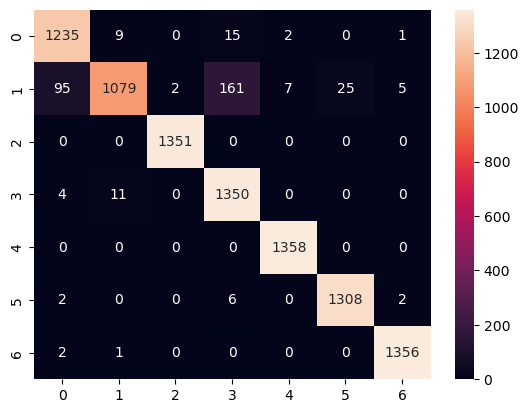

In [101]:
sns.heatmap(cm, annot = True, fmt='')

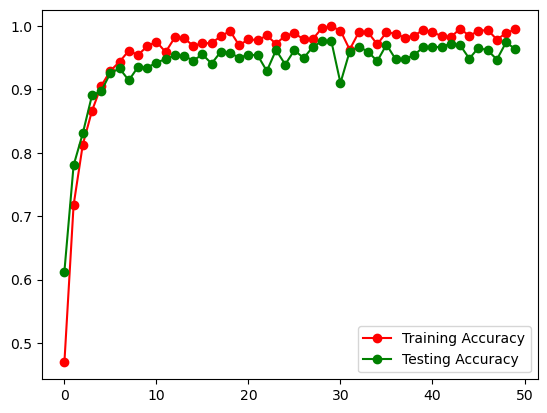

In [102]:
#training acc vs testing acc graph
plt.plot(history.history["accuracy"] , 'ro-' , label = "Training Accuracy")
plt.plot(history.history["val_accuracy"] , 'go-' , label = "Testing Accuracy")
plt.legend()
plt.show()

In [137]:
#predicting
y_pred  = model.predict(X_test).round()

294/294 [==============================] - 3s 10ms/step


In [138]:
target_names = [f"{classes[i]}" for i in range(7)]
print(len(Y_test) ,"  ",len(y_pred))
y_pred = list(map(lambda x: np.argmax(x), y_pred))
print(classification_report(Y_test , y_pred,target_names=target_names))

9387    9387
                                                               precision    recall  f1-score   support

('akiec', 'Actinic keratoses and intraepithelial carcinomae')       0.99      1.00      0.99      1359
                             ('bcc', ' basal cell carcinoma')       0.98      0.99      0.99      1318
                     ('bkl', 'benign keratosis-like lesions')       0.92      0.98      0.95      1262
                                     ('df', 'dermatofibroma')       1.00      1.00      1.00      1351
                                  ('nv', ' melanocytic nevi')       0.98      0.79      0.87      1374
              ('vasc', ' pyogenic granulomas and hemorrhage')       0.99      1.00      1.00      1358
                                          ('mel', 'melanoma')       0.88      0.99      0.93      1365

                                                     accuracy                           0.96      9387
                                                    macro 

# **NEW CNN Model 4-Layers  **

In [164]:
    model_CNN = Sequential()
    model_CNN.add(Conv2D(16, kernel_size = (3,3), input_shape = (28, 28, 3), activation = 'relu', padding = 'same'))
    model_CNN.add(MaxPool2D(pool_size = (2,2)))

    model_CNN.add(Conv2D(32, kernel_size = (3,3), activation = 'relu', padding = 'same'))
    model_CNN.add(MaxPool2D(pool_size = (2,2), padding = 'same'))

    model_CNN.add(Conv2D(64, kernel_size = (3,3), activation = 'relu', padding = 'same'))
    model_CNN.add(MaxPool2D(pool_size = (2,2), padding = 'same'))
    model_CNN.add(Conv2D(128, kernel_size = (3,3), activation = 'relu', padding = 'same'))
    model_CNN.add(MaxPool2D(pool_size = (2,2), padding = 'same'))

    model_CNN.add(Flatten())
    model_CNN.add(Dense(64, activation = 'relu'))
    model_CNN.add(Dense(32, activation='relu'))
    model_CNN.add(Dense(7, activation='softmax'))

    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)

    model_CNN.compile(loss = 'sparse_categorical_crossentropy',
                 optimizer = optimizer,
                  metrics = ['accuracy'])
    print(model_CNN.summary())


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 28, 28, 16)        448       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 16)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 14, 14, 32)        4640      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 7, 7, 64)          18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 4, 4, 64)        

In [165]:
history = model_CNN.fit(X_train,
                    Y_train,
                    validation_split=0.2,
                    batch_size = 128,
                    epochs = 50)

Epoch 1/50
235/235 [==============================] - 20s 77ms/step - loss: 2.5885 - accuracy: 0.3587 - val_loss: 1.2554 - val_accuracy: 0.5305
Epoch 2/50
235/235 [==============================] - 17s 74ms/step - loss: 1.1541 - accuracy: 0.5570 - val_loss: 1.1120 - val_accuracy: 0.5659
Epoch 3/50
235/235 [==============================] - 18s 76ms/step - loss: 0.9099 - accuracy: 0.6607 - val_loss: 0.8082 - val_accuracy: 0.6985
Epoch 4/50
235/235 [==============================] - 17s 74ms/step - loss: 0.7223 - accuracy: 0.7295 - val_loss: 0.6220 - val_accuracy: 0.7659
Epoch 5/50
235/235 [==============================] - 18s 76ms/step - loss: 0.5812 - accuracy: 0.7861 - val_loss: 0.5774 - val_accuracy: 0.7812
Epoch 6/50
235/235 [==============================] - 18s 76ms/step - loss: 0.4820 - accuracy: 0.8221 - val_loss: 0.4526 - val_accuracy: 0.8395
Epoch 7/50
235/235 [==============================] - 18s 75ms/step - loss: 0.3894 - accuracy: 0.8603 - val_loss: 0.4067 - val_accuracy:

In [185]:
results = model_CNN.evaluate(X_test , Y_test, verbose=0)

print("    Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

    Test Loss: 0.17276
Test Accuracy: 96.59%


# **NEW CNN Model 4-Layers with Early Stopping & Reduce Learning Rate **

In [187]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='auto')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, verbose=1, mode='auto')
history = model_CNN.fit(X_train,
                    Y_train,
                    validation_split=0.2,
                    batch_size = 64,
                    epochs = 50,
                    callbacks = [reduce_lr, early_stop])

Epoch 1/50
470/470 [==============================] - 19s 41ms/step - loss: 0.2260 - accuracy: 0.9308 - val_loss: 0.2124 - val_accuracy: 0.9465 - lr: 0.0010
Epoch 2/50
470/470 [==============================] - 20s 42ms/step - loss: 0.0955 - accuracy: 0.9682 - val_loss: 0.1509 - val_accuracy: 0.9577 - lr: 0.0010
Epoch 3/50
470/470 [==============================] - 19s 41ms/step - loss: 0.0529 - accuracy: 0.9820 - val_loss: 0.1256 - val_accuracy: 0.9635 - lr: 0.0010
Epoch 4/50
470/470 [==============================] - 20s 42ms/step - loss: 0.0847 - accuracy: 0.9714 - val_loss: 0.1910 - val_accuracy: 0.9485 - lr: 0.0010
Epoch 5/50
470/470 [==============================] - 20s 42ms/step - loss: 0.0492 - accuracy: 0.9837 - val_loss: 0.2246 - val_accuracy: 0.9537 - lr: 0.0010
Epoch 6/50
470/470 [==============================] - 19s 41ms/step - loss: 0.0567 - accuracy: 0.9819 - val_loss: 0.1146 - val_accuracy: 0.9714 - lr: 0.0010
Epoch 7/50
470/470 [==============================] - 20s 

In [188]:
results = model_CNN.evaluate(X_test , Y_test, verbose=0)

print("    Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

    Test Loss: 0.10330
Test Accuracy: 98.09%


In [189]:
y_pred  = model_CNN.predict(X_test).round()

294/294 [==============================] - 3s 9ms/step


In [190]:
target_names = [f"{classes[i]}" for i in range(7)]
print(len(Y_test) ,"  ",len(y_pred))
y_pred = list(map(lambda x: np.argmax(x), y_pred))
print(classification_report(Y_test , y_pred,target_names=target_names))

9387    9387
                                                               precision    recall  f1-score   support

('akiec', 'Actinic keratoses and intraepithelial carcinomae')       0.99      1.00      1.00      1359
                             ('bcc', ' basal cell carcinoma')       0.99      1.00      0.99      1318
                     ('bkl', 'benign keratosis-like lesions')       0.95      1.00      0.97      1262
                                     ('df', 'dermatofibroma')       1.00      1.00      1.00      1351
                                  ('nv', ' melanocytic nevi')       1.00      0.87      0.93      1374
              ('vasc', ' pyogenic granulomas and hemorrhage')       1.00      1.00      1.00      1358
                                          ('mel', 'melanoma')       0.94      1.00      0.97      1365

                                                     accuracy                           0.98      9387
                                                    macro 